<a href="https://colab.research.google.com/github/joybratas1/Credit-Card-Fraud-Project/blob/main/CreditCarFraud_Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter # counter takes values returns value_counts dictionary
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
import os

##Getting the Dataset imported from Kaggle-
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
url_l='https://www.kaggle.com/mlg-ulb/creditcardfraud'
od.download(url_l)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joybratasarkar
Your Kaggle Key: ··········


 21%|██        | 14.0M/66.0M [00:00<00:00, 144MB/s]

100%|██████████| 66.0M/66.0M [00:00<00:00, 121MB/s]


In [ ]:
file_name='/content/creditcardfraud/creditcard.csv'

##Converting the CSV file to Pandas dataframe.

In [ ]:
df= pd.read_csv(file_name)
df.dataframeName = 'European Credit card Fraud data.csv'
nRow, nCol = df.shape
print('There are {} rows and {} columns in our Dataset'.format(nRow,nCol))


There are 284807 rows and 31 columns in our Dataset


### Dataset Details and Values of the Rows and Columns 

In [ ]:
df.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Observations
* Time, Amount and Class Column are recognisable.
* There are 29 Input Variables and 1 Output Variable (Class)
* V1-V28 are probably tranformed using PCA for confidentiality. It can be assumed that the data might be scaled as per normal conventions. Normalization is important in PCA since it is a variance maximizing exercise

We will check for null or missing values in the dataset.


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* There is no null value in the dataset so we dont have to handle null values.


Removing the memory usage by the dataframe as it might take time when we will use predictive analysis.

In [ ]:
def reduce_memory(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

df = reduce_memory(df)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 17.11 MB
Decreased by 74.6%


## Descriptive Statistics on the Credit Data

In [ ]:
df.describe()

Time             V1  ...         Amount          Class
count  284807.000000  284807.000000  ...  284807.000000  284807.000000
mean    94812.664062      -0.000062  ...            NaN       0.001727
std     47487.195312       0.000000  ...            NaN       0.041527
min         0.000000     -56.406250  ...       0.000000       0.000000
25%     54201.500000      -0.920410  ...       5.601562       0.000000
50%     84692.000000       0.018112  ...      22.000000       0.000000
75%    139320.500000       1.315430  ...      77.187500       0.000000
max    172792.000000       2.455078  ...   25696.000000       1.000000

[8 rows x 31 columns]

* It can be seen the 75% data for Amount Column has 77.187 value whereas the Maximum value is 25696.
* This hints of presence of Outliers in the Amount Data.

## Correlation Matrix

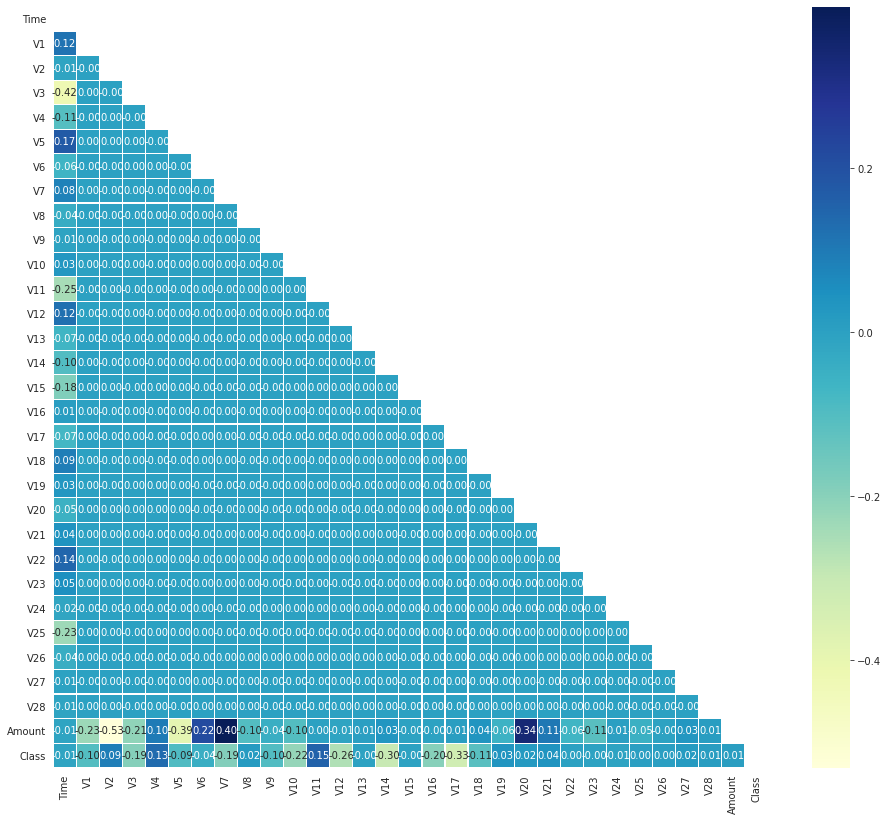

In [ ]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


with sns.axes_style("white"):
    plt.figure(figsize = (16,14))
    sns.heatmap(corr, mask=mask, linewidths=.1, cmap="YlGnBu", annot=True, fmt=".2f")

Inference From the Correlation Matrix-
 The variables are not correlated.


In [ ]:
vc = df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
#vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})

print('No Frauds Cases are ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset i.e.', vc.iloc[0,1])
print('Frauds Cases are', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset i.e.', vc.iloc[1,1])


No Frauds Cases are  99.83 % of the dataset i.e. 284315
Frauds Cases are 0.17 % of the dataset i.e. 492


**Note**: We can see how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

### Let us visualise this distribution- using Bar Plot and Pie Chart

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

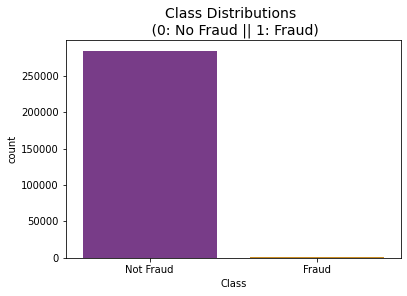

In [ ]:
fig = sns.countplot(x = 'Class', data = df, palette='CMRmap')
fig.set_xticklabels(labels=['Not Fraud', 'Fraud'], rotation=0);
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### Visualising  Pie Chart

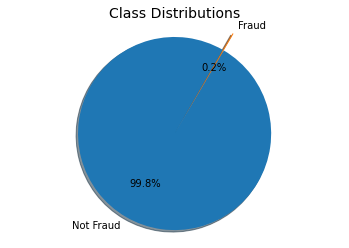

In [ ]:
labels = 'Not Fraud', 'Fraud'
explode = (0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(df['Class'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.title('Class Distributions', fontsize=14)
plt.show()

* Its clearly shows the skewness of the Classes.

* Lets see the  distribution of the other Columns

### Correlation Types

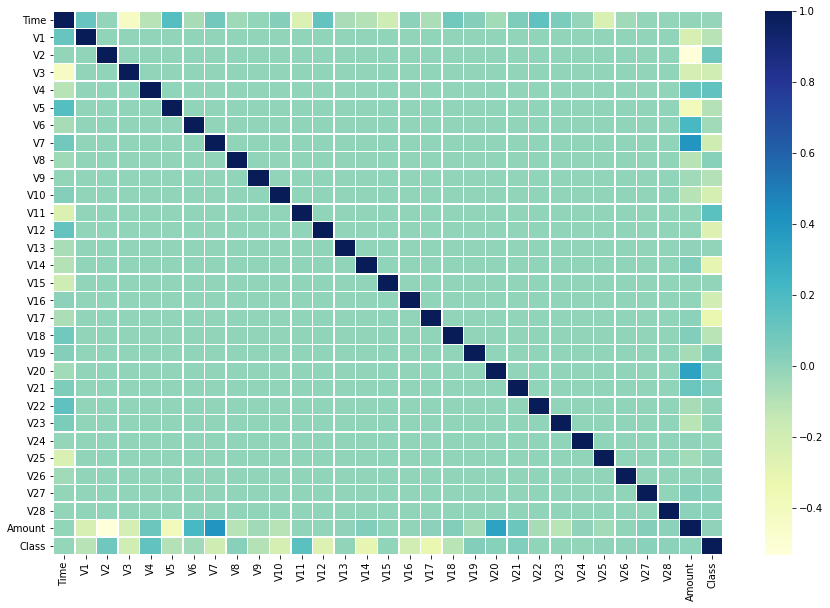

In [ ]:
#Type2
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, 
            annot=False, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

### DIstribution of Transaction Amount and Time
Done to check the skweness of the Amount and Time.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



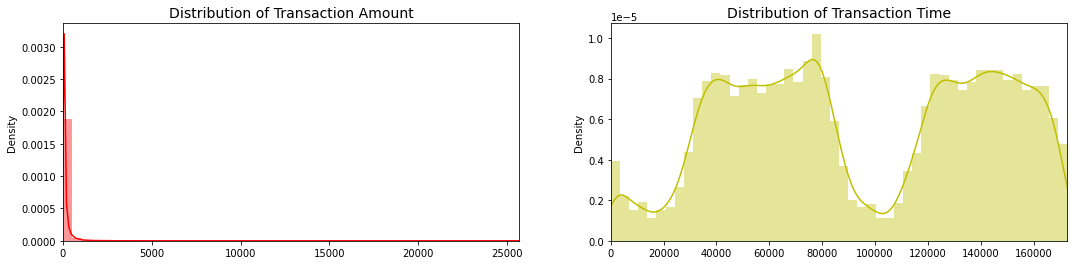

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='y')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

* The distributions are not normal and we can see Amount Transactions are highly right skwed. Also we can see there are possoiblity of Outliers in Amount data.
* To normalize the distribution we are going to use a method called Feature Scaling. ALso because the other columns(V1-V28) are all scaled.
* In our case it is better to use the Robust Scaler algorithm because it's robust to outliers. 



In [ ]:
"""
fig = px.scatter(df, # the dataframe that has the data points we want to plot
                 x = 'Time', # the name of the column in the dataframe whose values will be plotted on the x-axis
                 y = 'Amount', # the name of the column in the dataframe whose values will be plotted on the x-axis
                 color = 'Class',# the name of the column that will be used to assign colour to the marks on the Scatter Plot fraud=1 no fraud=0
                 title='Transaction Amount VS Time', # Title of the plot
                 template = 'ggplot2' # ggplot2 is one of the in-built templates in plotly, used for some theming of the graphs
                )
fig.show()
"""

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



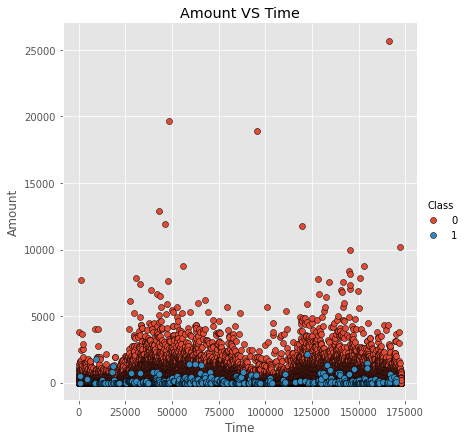

In [ ]:
plt.style.use("ggplot")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.title("Amount VS Time")
plt.show()

In [ ]:
fig = px.box(df, 
             y = 'Class',x='Amount', # we have swapped the x and y column variables in this case
             title = 'Distribution of Amount across various slope',
             orientation = 'h',
             #orientation = 'h' means we want a horizontal box plot
             )
fig.show()

**Observation from the Above two diagrams of Amount Vs Time and Box Plot**
* It can be seen almost all of the Fraud Cases occured for Amounts less than 400 and highest for amount=2150.
*  However, the frauds in the transactions are evenly distributed throughout all times.

* Also the outliers for Amount with No Fraud must be handled. 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:296: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:192: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/gofplots.py:736: RuntimeWarning:

invalid value encountered in multiply



<Figure size 720x288 with 0 Axes>

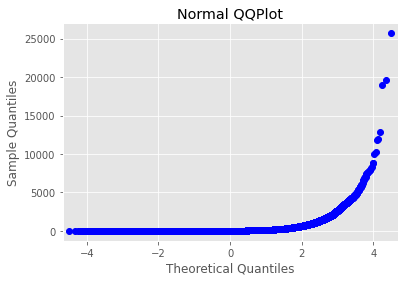

In [ ]:
from statsmodels.graphics.gofplots import qqplot
def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(df['Amount'])

Its Outliers are easily visible.

### Handling The Outlier

Detecting the Outlier using -

- Hypothesis Test(Grubbs's)
- Robust Z-Score

In [ ]:
#Grubb's Test
import scipy.stats as stats
x = df['Amount']
#y = np.array([12,13,14,19,21,23,45])
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("\nFrom grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there are outliers\n")
grubbs_test(x)

Grubbs Calculated Value: nan
Grubbs Critical Value: 5.223395274988827

From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there are outliers



### Box-Cox Transform

Box-Cox doesnt allow 0 or negative values. Lets check if we have any of them.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

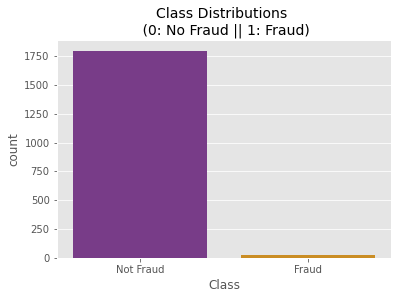

In [ ]:
#np.sum((df['Amount'] == 0).values.ravel())
#df['Amount'] == 0
rslt_df = df[df['Amount'] == 0]
fig = sns.countplot(x = 'Class', data = rslt_df, palette='CMRmap')
fig.set_xticklabels(labels=['Not Fraud', 'Fraud'], rotation=0);
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [ ]:
vc = rslt_df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(rslt_df), 2))
#vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})

print('No Frauds Cases are ', round(rslt_df['Class'].value_counts()[0]/len(rslt_df) * 100,2), '% of the dataset i.e.', vc.iloc[0,1])
print('Frauds Cases are', round(rslt_df['Class'].value_counts()[1]/len(rslt_df) * 100,2), '% of the dataset i.e.', vc.iloc[1,1])

No Frauds Cases are  98.52 % of the dataset i.e. 1798
Frauds Cases are 1.48 % of the dataset i.e. 27


There are quite a few 0 values in Amount Column. 
So we will use an adaptive method for Box-Cox Transform.

This method works if and only if lambda >=0

In [ ]:
from scipy import stats
data = df['Amount'].values
posdata = data[data > 0]
bcdata, lam = stats.boxcox(posdata)
lam

0.043850825882172983

In [ ]:
x = np.empty_like(data)
x[data > 0] = bcdata
x[data == 0] = -1/lam

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Normalized data')

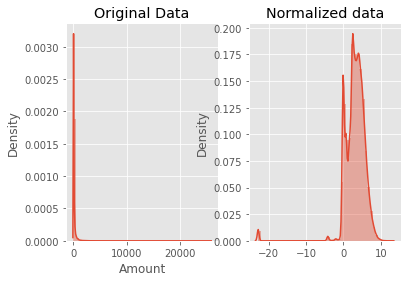

In [ ]:
fig, ax=plt.subplots(1,2)
sns.distplot(df["Amount"], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(x, ax=ax[1])
ax[1].set_title("Normalized data")

The Amount Column is transformed.

## Perform Feature Selection

Filter Method

Wrapper Method(RFE)

## Data Preprocessing 

### Scaling


* Data often consists of many different input variables and features in the column. They may contain very large values in terms of other input variables columns. This may result in skewness in the ML models as large valuies will dominate.
* As such, it is normal to scale input variables to a common range as a data preparation technique prior to fitting a model.

* In this phase of our kernel, we will first scale the columns comprise of Time and Amount as most of the Columns V1-V28 are already transformed using scaling and PCA. So Time and amount should be scaled as the other columns.


* **Scaled amount** and **scaled time** are the columns with scaled values.

* We will use Robust Scaler asd it is less prone to outlier than Standard Scalar. This is because standardization can become skewed or biased if the input variable contains outlier values.

In [ ]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

In [ ]:
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
#df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
df.head()

Time        V1        V2  ...  Class  scaled_amount  scaled_time
0   0.0 -1.359375 -0.072754  ...      0       1.783203    -0.994983
1   0.0  1.191406  0.266113  ...      0      -0.269775    -0.994983
2   1.0 -1.358398 -1.339844  ...      0       4.984375    -0.994972
3   1.0 -0.966309 -0.185181  ...      0       1.417969    -0.994972
4   2.0 -1.158203  0.877930  ...      0       0.670410    -0.994960

[5 rows x 33 columns]

In [ ]:
fig = px.box(df, 
             y = 'Class',x='scaled_amount', # we have swapped the x and y column variables in this case
             title = 'Distribution of Amount across various slope',
             orientation = 'h',
             #orientation = 'h' means we want a horizontal box plot
             )
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



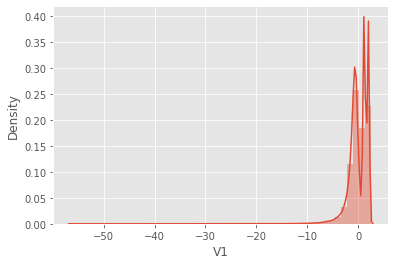

In [ ]:
sns.distplot(df.V1)

### Feature Selection by Ensembling(Using a classifier to bring out the imoportant Features.)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=340)
model.fit(df.drop(['Class','Amount','Time'], axis=1), df.Class)
#y = new_df.Class
#X = new_df.drop('Class', axis=1)
importance = model.feature_importances_

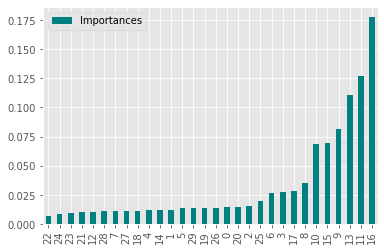

In [ ]:
rf_df = pd.DataFrame({"Features": pd.DataFrame(df.drop(['Class','Amount','Time'], axis=1)).columns, "Importances":importance})
rf_df.set_index('Importances')

rf_df = rf_df.sort_values('Importances')

rf_df.plot.bar(color='teal')


In [ ]:
rf_df.sort_values('Importances')

Features  Importances
22            V23     0.007101
24            V25     0.008992
23            V24     0.009771
21            V22     0.010241
12            V13     0.010544
28  scaled_amount     0.010928
7              V8     0.011169
27            V28     0.011538
18            V19     0.011576
4              V5     0.011797
14            V15     0.011879
1              V2     0.012357
5              V6     0.013564
29    scaled_time     0.013607
19            V20     0.013740
26            V27     0.013761
0              V1     0.014668
20            V21     0.014721
2              V3     0.015157
25            V26     0.019782
6              V7     0.026282
3              V4     0.027466
17            V18     0.028250
8              V9     0.035595
10            V11     0.068967
15            V16     0.069242
9             V10     0.081856
13            V14     0.110760
11            V12     0.127013
16            V17     0.177677


## Resampling of Imbalance Dataset

We are performing resampling of Dataset to minimise the imbalance.

We will analyse with the basic techniques initially i.e.-
* Undersampling
* OverSampling



### Random UnderSampling

* We check the Fraud(=1) transactions using Value.count() and once we determine how many instances are considered fraud transactions (Fraud = "1") , we bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio).
* In our case the Fraud Transactions are 492. So Non-fraud must be 492.
* The main disadvantage is the large chunk of information loss in our case we are scaling down the Non-fraud Transactions from 2.80 Lakhs to 492 only.


In [ ]:
#Undersampling

df = df.sample(frac=1)   # Shuffling the Data

fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0][:492]   # Selecting only 492
new_distribution = pd.concat([fraud, non_fraud])

new_df = new_distribution.sample(frac=1, random_state=42) #Shuffling the rows

new_df.head()

V1        V2        V3  ...  Class  scaled_amount  scaled_time
201004  2.115234 -0.077759 -3.826172  ...      0      -0.167603     0.575594
230076 -0.067688  4.250000 -6.539062  ...      1      -0.296631     0.722365
114948  1.236328 -0.488281 -0.182861  ...      0      -0.097778    -0.129301
123238  1.140625  1.156250 -1.471680  ...      1      -0.293457    -0.092048
143335 -6.714844  3.921875 -9.750000  ...      1       3.224609     0.006967

[5 rows x 31 columns]

* Hence we have balanced the data using Undersampling. Lets analyse!

In [ ]:
print(new_df['Class'].value_counts())

1    492
0    492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

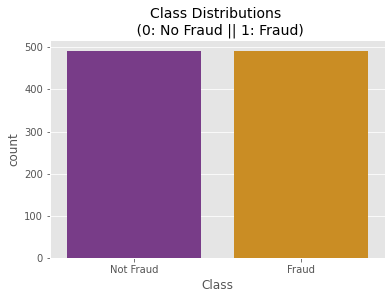

In [ ]:
fig = sns.countplot(x = 'Class', data = new_df, palette='CMRmap')
fig.set_xticklabels(labels=['Not Fraud', 'Fraud'], rotation=0);
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### Correlation For Undersampling


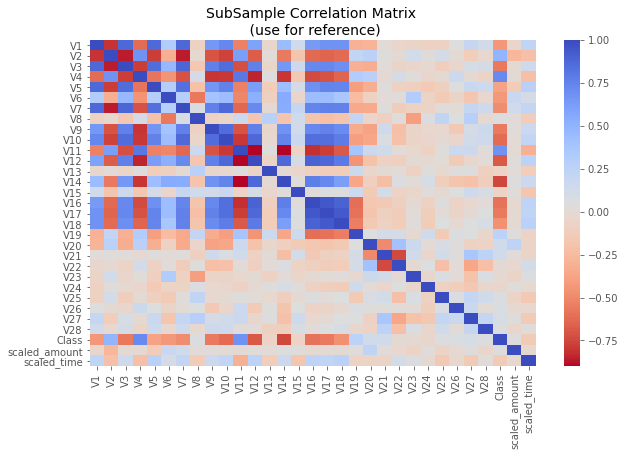

In [ ]:
sub_sample_corr = new_df.corr()
fig = plt.figure(figsize=(10,6))
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

### Oversampling
* Over-Sampling balances dataset by increasing/Upsampling the size of Minority Class.

* As we are just copying the datas so there will be a problem of Overfitting.


In [ ]:
# Oversampling
from sklearn.utils import resample

# separate minority and majority classes
non_fraud_1 = df[df['Class']==0]
fraud_1 = df[df['Class']==1]

# upsample Fraud(minority) class
upsample = resample(fraud_1,replace=True, 
                          n_samples=len(non_fraud_1) # match number in majority class
                          )

# combine majority and upsampled minority
oversampled = pd.concat([non_fraud_1, upsample])

In [ ]:
print(oversampled['Class'].value_counts())

1    284315
0    284315
Name: Class, dtype: int64


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

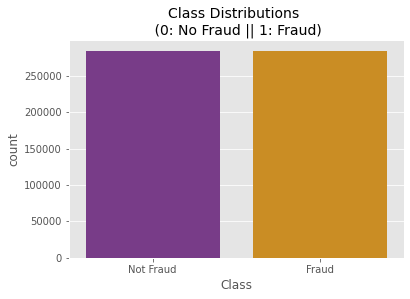

In [ ]:
fig = sns.countplot(x="Class", data=  oversampled, palette="CMRmap")
fig.set_xticklabels(labels=['Not Fraud', 'Fraud'], rotation=0);
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

* Correlation for Oversampled Data

.

.

.

.

**NEERAJ**

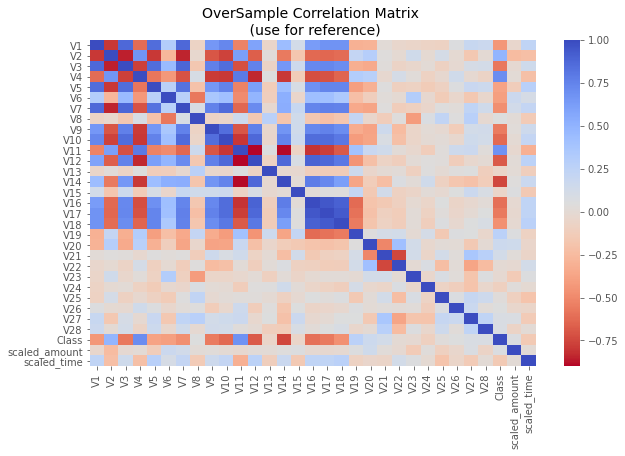

In [ ]:
up_sample_corr = oversampled.corr()
fig = plt.figure(figsize=(10,6))
sns.heatmap(up_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('OverSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



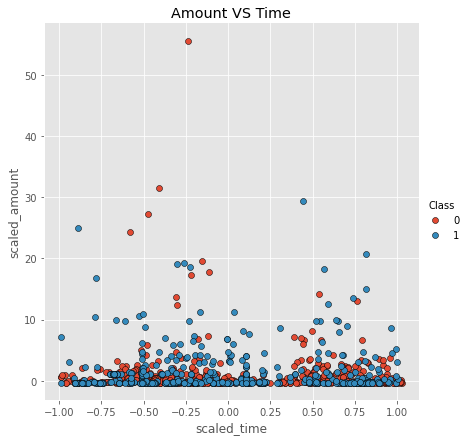

In [ ]:
plt.style.use("ggplot")
sns.FacetGrid(new_df, hue="Class", size = 6).map(plt.scatter, "scaled_time","scaled_amount",  edgecolor="k").add_legend()
plt.title("Amount VS Time")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



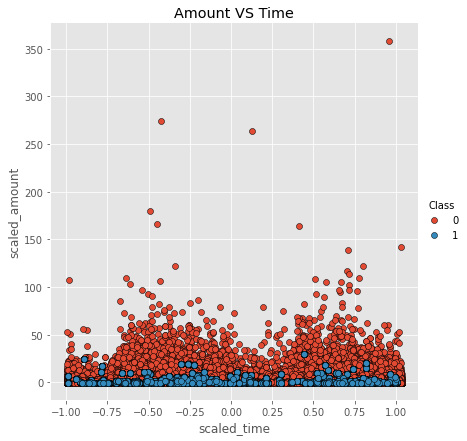

In [ ]:
plt.style.use("ggplot")
sns.FacetGrid(oversampled, hue="Class", size = 6).map(plt.scatter, "scaled_time","scaled_amount", edgecolor="k").add_legend()
plt.title("Amount VS Time")
plt.show()

* For Oversampled we can see the distribution of Fraud Cases (Time vs Amount) is concentrated. This is evident that the Oversampling created copies.

### Predicting using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


### Splitting the Dataset 

* We will split the dataset into Tran-Test Sets as 75-25 Ratio.
* This is done to make the Test-Train Sets forprediction.

In [ ]:
#Undersampling
y = new_df.Class
X = new_df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(738, 30) (246, 30) (738,) (246,)


In [ ]:
#Oversampling
y1 = oversampled.Class
X1 = oversampled.drop('Class', axis=1)

# setting up testing and training sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=1236,stratify=y1)

In [ ]:
print("Oversampled Train-Test Dataset")
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

Oversampled Train-Test Dataset
(426472, 30) (142158, 30) (426472,) (142158,)


* **Our Task now is to check the performance of classifier for these two Sampling Technique.**

* We are using Logistic Regression Classifier to test our Performance.

* In later kernels we will experiment with more advanced Sampling Algorithm that have proven to be more effecftive for Imbalanced Datasets

In [ ]:
#Undersampled
pred_df = LogisticRegression()
under_sam = pred_df.fit(X_train, y_train)

In [ ]:
#Oversampled
clf= LogisticRegression()
clf.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Performance Calculation

* Accuracy
* Precision
* F1 Score
* Recall SCore
* AUC Curve.

### Random Undersampling Performance

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report
y_pred = under_sam.predict(X_test_s)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test_s, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test_s, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test_s, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test_s, y_pred)))
print(classification_report(y_test_s, y_pred))
print("1= Fraud Detect Performance, 0= Non-Fraud Detect Performance")

Accuracy on test set: 95.981%
Precision on test set: 0.038
Recall on test set: 0.926
F1-Score on test set: 0.074
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     93825
           1       0.04      0.93      0.07       162

    accuracy                           0.96     93987
   macro avg       0.52      0.94      0.53     93987
weighted avg       1.00      0.96      0.98     93987

1= Fraud Detect Performance, 0= Non-Fraud Detect Performance


                             confusion matrix


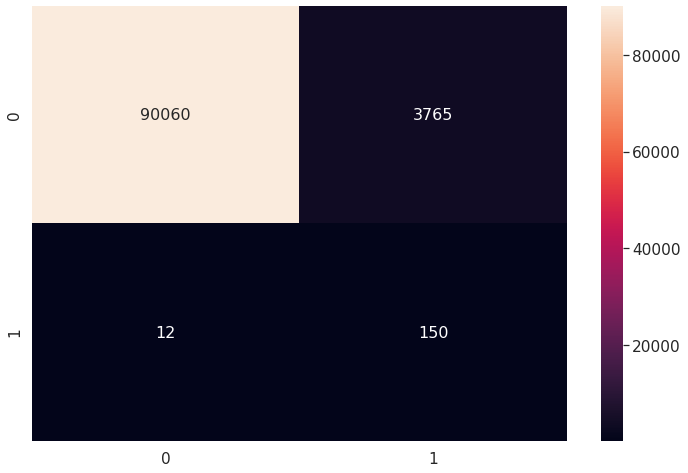

                               Precision matrix


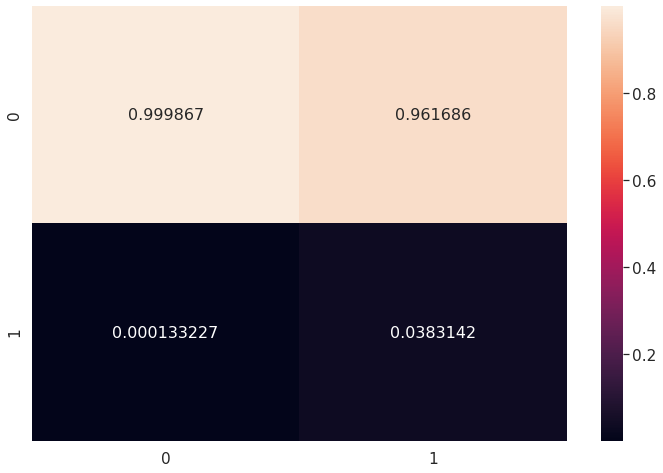

In [ ]:
print(" "*28, "confusion matrix")
plt.figure(figsize=(12,8))
matrix=confusion_matrix(y_test_s, y_pred)
df_cm = pd.DataFrame(matrix)
sns.set(font_scale=1.4)#for label size
labels = ['0','1']
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)
plt.show()
A =(matrix/matrix.sum(axis=0))

print(" "*30, "Precision matrix")

plt.figure(figsize=(12,8))
sns.heatmap(A, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels=labels, yticklabels=labels)
labels = ['0','1']
plt.show()

### Random Oversampling Performance

In [ ]:

y_pred_1 = clf.predict(X_test_s)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test_s, y_pred_1)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test_s, y_pred_1)))
print("Recall on test set: %0.3f"%(recall_score(y_test_s, y_pred_1)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test_s, y_pred_1)))
print(classification_report(y_test_s, y_pred_1))
print("1= Fraud Detect Performance, 0= Non-Fraud Detect Performance")

Accuracy on test set: 97.783%
Precision on test set: 0.068
Recall on test set: 0.932
F1-Score on test set: 0.127
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93825
           1       0.07      0.93      0.13       162

    accuracy                           0.98     93987
   macro avg       0.53      0.96      0.56     93987
weighted avg       1.00      0.98      0.99     93987

1= Fraud Detect Performance, 0= Non-Fraud Detect Performance


                             confusion matrix


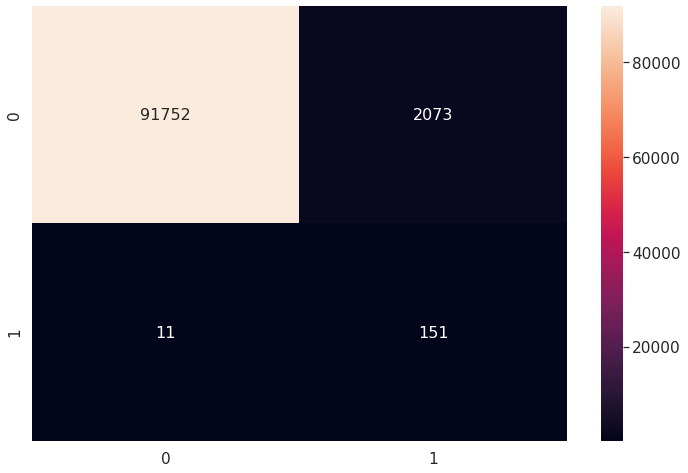

                               Precision matrix


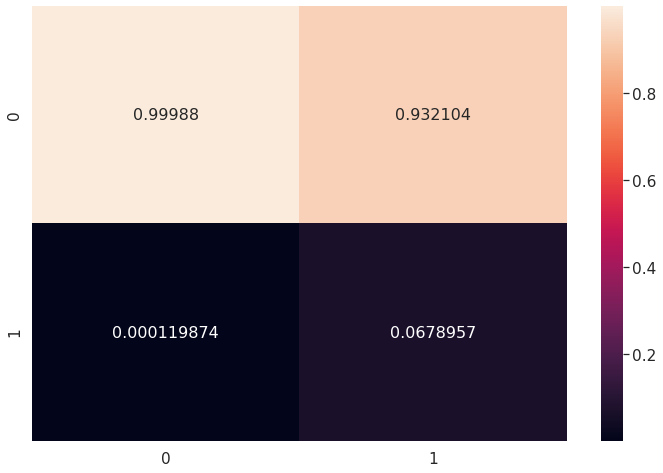

In [ ]:
print(" "*28, "confusion matrix")
plt.figure(figsize=(12,8))
matrix_1=confusion_matrix(y_test_s, y_pred_1)
oversampled_cm = pd.DataFrame(matrix_1)
sns.set(font_scale=1.4)#for label size
labels = ['0','1']
sns.heatmap(oversampled_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)
plt.show()
B =(matrix_1/matrix_1.sum(axis=0))
print(" "*30, "Precision matrix")

plt.figure(figsize=(12,8))
sns.heatmap(B, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels=labels, yticklabels=labels)
labels = ['0','1']
plt.show()

In [ ]:
#AUC-ROC Score and Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test1, y_pred_1)
print('AUC: %.3f' % auc)

AUC: 0.950


### We will Perform Other State-of-the-art Sampling Techniques Next

### SMOTE

* We will first split the data as research has shown SMOTE to work better if splitting is done beforehand

In [ ]:
y_s = df.Class
X_s = df.drop('Class', axis=1)

# setting up testing and training sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.33, random_state=2 ,stratify=y_s)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
X_train_new, y_train_new = sm.fit_sample(X_train_s, y_train_s.ravel())
X_test_new, y_test_new = sm.fit_sample(X_test_s, y_test_s.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
#pd.Series(y_train_new).value_counts().plot.bar()


In [ ]:
l1= list(y_train_new)
x5= pd.DataFrame(l1)
x5.columns=["Class"]
x5.value_counts()


Class
1        190490
0        190490
dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

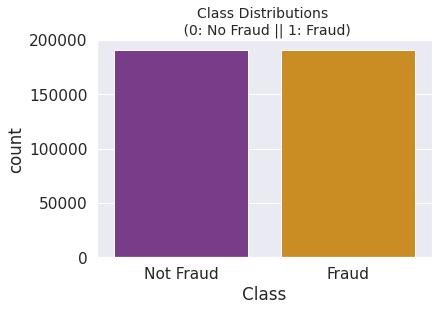

In [ ]:
fig = sns.countplot(x=x5["Class"], data=  x5, palette="CMRmap")
fig.set_xticklabels(labels=['Not Fraud', 'Fraud'], rotation=0);
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Predicting the datas after using SMOTE

In [ ]:
pred_df = LogisticRegression()
pred_df.fit(X_train_new, y_train_new)

# prediction for Training data
train_smote = pred_df.predict(X_train_new)

# prediction for Testing data
test_smote = pred_df.predict(X_test_s)


In [ ]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test_s, test_smote, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted      0     1    All
True                         
0          91479  2346  93825
1             14   148    162
All        91493  2494  93987


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report
y_pred_s = test_smote
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test_s, test_smote)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test_s, test_smote)))
print("Recall on test set: %0.3f"%(recall_score(y_test_s, test_smote)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test_s, test_smote)))


print("1= Fraud Detect Performance, 0= Non-Fraud Detect Performance")

Accuracy on test set: 97.489%
Precision on test set: 0.059
Recall on test set: 0.914
F1-Score on test set: 0.111
1= Fraud Detect Performance, 0= Non-Fraud Detect Performance


                             confusion matrix


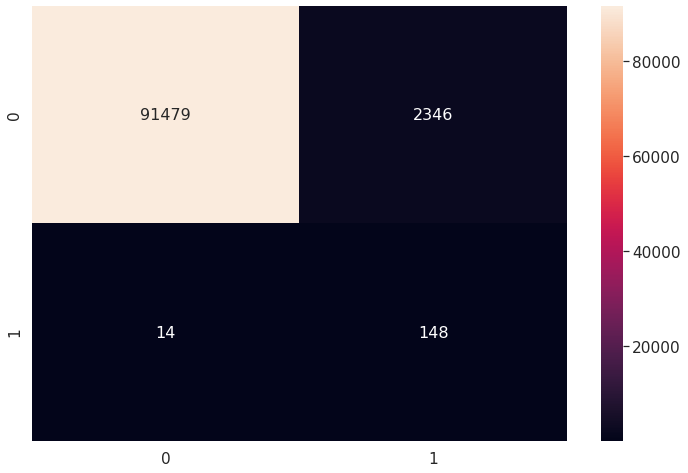

In [ ]:
print(" "*28, "confusion matrix")
plt.figure(figsize=(12,8))
matrix_1=confusion_matrix(y_test_s, test_smote)
oversampled_cm = pd.DataFrame(matrix_1)
sns.set(font_scale=1.4)#for label size
labels = ['0','1']
sns.heatmap(oversampled_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)
plt.show()

In [ ]:
print("The SMOTE sampling is detecting ", 5392/(88433+5392)*100, "% of Fraud cases as None Fraud")

The SMOTE sampling is detecting  5.746869171329603 % of Fraud cases as None Fraud


### Observation

**The SMOTE sampling is detecting  5.746% of Fraud cases as None Fraud**



### ADASYN  (Oversampling)
ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.

In [ ]:
from collections import Counter # counter takes values returns value_counts dictionary
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_s, y_train_s)   # Using the split done during SMOTE  ln-46
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Resampled dataset shape Counter({1: 190492, 0: 190490})


In [ ]:
pred_df.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = pred_df.predict(X_test_s)

In [ ]:
#print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_pred_adasyn))) 
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test_s, y_pred_adasyn)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test_s, y_pred_adasyn)))
print("Recall on test set: %0.3f"%(recall_score(y_test_s, y_pred_adasyn)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test_s, y_pred_adasyn)))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test_s, y_pred_adasyn, rownames = ['True'], colnames = ['Predicted'], margins = True))

Accuracy on test set: 91.420%
Precision on test set: 0.018
Recall on test set: 0.932
F1-Score on test set: 0.036
Confusion Matrix - Training Dataset
Predicted      0     1    All
True                         
0          85772  8053  93825
1             11   151    162
All        85783  8204  93987


                             confusion matrix


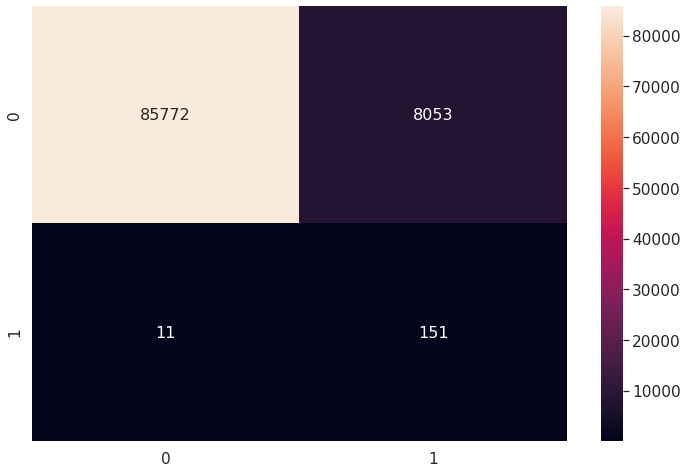

In [ ]:
print(" "*28, "confusion matrix")
plt.figure(figsize=(12,8))
matrix_1=confusion_matrix(y_test_s,  y_pred_adasyn)
oversampled_cm = pd.DataFrame(matrix_1)
sns.set(font_scale=1.4)#for label size
labels = ['0','1']
sns.heatmap(oversampled_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)
plt.show()

## MSMOTE

Modified synthetic minority oversampling Technique- It is a modified version of SMOTE. SMOTE does not consider the underlying distribution of the minority class and latent noises in the dataset.MSMOTE classifies the samples of minority classes into three groups such as security samples, latent nose samples, and border samples. This is done by calculating the distances among samples of the minority class and samples of the training data.

In [ ]:
pip install smote_variants    #https://smote-variants.readthedocs.io/en/latest/installation.html

In [ ]:
pip install imbalanced_databases

In [ ]:
import smote_variants as sv

In [ ]:
len(y_train_s)

190820

In [ ]:
ms_smote = sv.MulticlassOversampling(sv.MSMOTE())
#ms_smote1= sv.MSMOTE(random_state= 10)

X_train_ms, y_train_ms = ms_smote.sample(X_train_s, y_train_s)


2021-07-01 16:53:27,298:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2021-07-01 16:53:27,360:INFO:MulticlassOversampling: Sampling minority class with label: 1
2021-07-01 16:53:27,401:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [ ]:
print('Resampled dataset shape %s' % Counter(y_train_ms))


Resampled dataset shape Counter({0: 190490, 1: 190490})


In [ ]:
pred = LogisticRegression(max_iter=200)
pred.fit(X_train_ms, y_train_ms)
y_pred_ms = pred.predict(X_test_s)

In [ ]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test_s, y_pred_ms)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test_s, y_pred_ms)))
print("Recall on test set: %0.3f"%(recall_score(y_test_s, y_pred_ms)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test_s, y_pred_ms)))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test_s, y_pred_ms, rownames = ['True'], colnames = ['Predicted'], margins = True))

Accuracy on test set: 99.614%
Precision on test set: 0.289
Recall on test set: 0.852
F1-Score on test set: 0.432
Confusion Matrix - Training Dataset
Predicted      0    1    All
True                        
0          93486  339  93825
1             24  138    162
All        93510  477  93987


                             confusion matrix


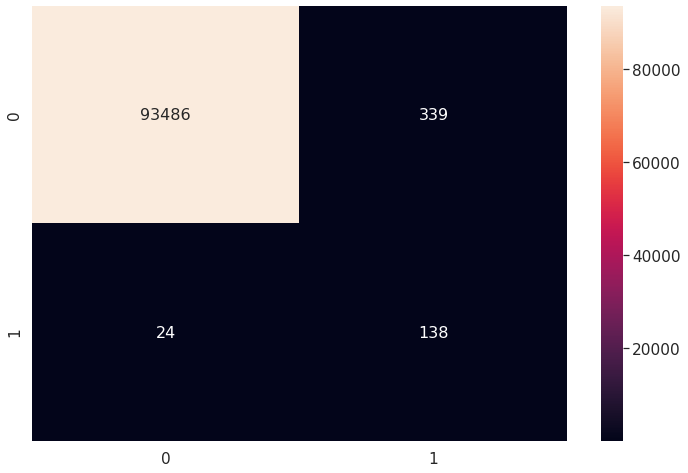

In [ ]:
print(" "*28, "confusion matrix")
plt.figure(figsize=(12,8))
matrix_1=confusion_matrix(y_test_s,  y_pred_ms)
oversampled_cm = pd.DataFrame(matrix_1)
sns.set(font_scale=1.4)#for label size
labels = ['0','1']
sns.heatmap(oversampled_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)
plt.show()

###Observations-
It gives a better result than SMOTE or ADASYN in F1 score
But we can see it detects (24/162) i.e 14% as Non-fraud 



## SMOTE with TOMEK Link
This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class (that is, samples of data from the majority class that is closest with the minority class data). 

In [ ]:
tomek = sv.MulticlassOversampling(sv.SMOTE_TomekLinks())
X_train_tomek, y_train_tomek = tomek.sample(X_train_s, y_train_s)

2021-07-01 16:54:48,547:INFO:MulticlassOversampling: Running multiclass oversampling with strategy eq_1_vs_many_successive
2021-07-01 16:54:48,608:INFO:MulticlassOversampling: Sampling minority class with label: 1
2021-07-01 16:54:48,641:INFO:SMOTE_TomekLinks: Running sampling via ('SMOTE_TomekLinks', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2021-07-01 16:54:48,643:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': <module 'numpy.random' from '/usr/local/lib/python3.7/dist-packages/numpy/random/__init__.py'>}")
2021-07-01 16:54:49,361:INFO:TomekLinkRemoval: Running noise removal via TomekLinkRemoval


In [ ]:
print('Resampled dataset shape %s' % Counter(y_train_tomek))


Resampled dataset shape Counter({0: 190490, 1: 190490})


In [ ]:
pred_df.fit(X_train_tomek, y_train_tomek)
y_pred_tomek = pred_df.predict(X_test_s)

In [ ]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test_s, y_pred_tomek)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test_s, y_pred_tomek)))
print("Recall on test set: %0.3f"%(recall_score(y_test_s, y_pred_tomek)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test_s, y_pred_tomek)))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test_s, y_pred_tomek, rownames = ['True'], colnames = ['Predicted'], margins = True))

Accuracy on test set: 97.488%
Precision on test set: 0.059
Recall on test set: 0.914
F1-Score on test set: 0.111
Confusion Matrix - Training Dataset
Predicted      0     1    All
True                         
0          91478  2347  93825
1             14   148    162
All        91492  2495  93987


                             confusion matrix


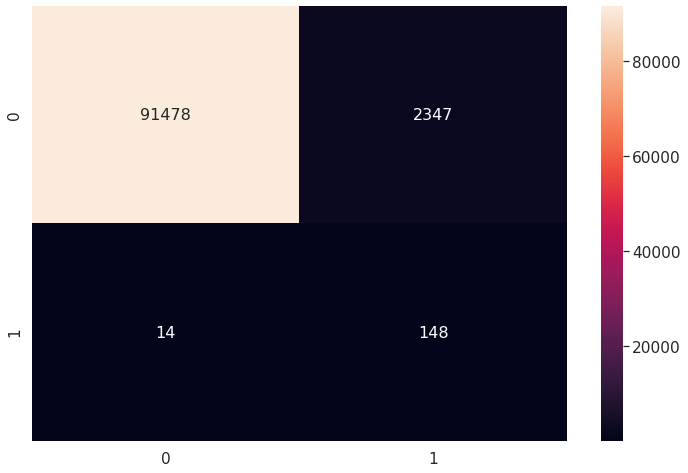

In [ ]:
print(" "*28, "confusion matrix")
plt.figure(figsize=(12,8))
matrix_1=confusion_matrix(y_test_s,  y_pred_tomek)
oversampled_cm = pd.DataFrame(matrix_1)
sns.set(font_scale=1.4)#for label size
labels = ['0','1']
sns.heatmap(oversampled_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)
plt.show()

### Observations-
F1 , Precision and Recall SCore are low.

### SMOTE + ENN

SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train_s, y_train_s)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
pred_df.fit(X_train_smenn, y_train_smenn)
y_pred_smenn = pred_df.predict(X_test_s)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test_s, y_pred_smenn)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test_s, y_pred_smenn)))
print("Recall on test set: %0.3f"%(recall_score(y_test_s, y_pred_smenn)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test_s, y_pred_smenn)))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test_s, y_pred_smenn, rownames = ['True'], colnames = ['Predicted'], margins = True))

Accuracy on test set: 97.326%
Precision on test set: 0.056
Recall on test set: 0.914
F1-Score on test set: 0.105
Confusion Matrix - Training Dataset
Predicted      0     1    All
True                         
0          91326  2499  93825
1             14   148    162
All        91340  2647  93987


                             confusion matrix


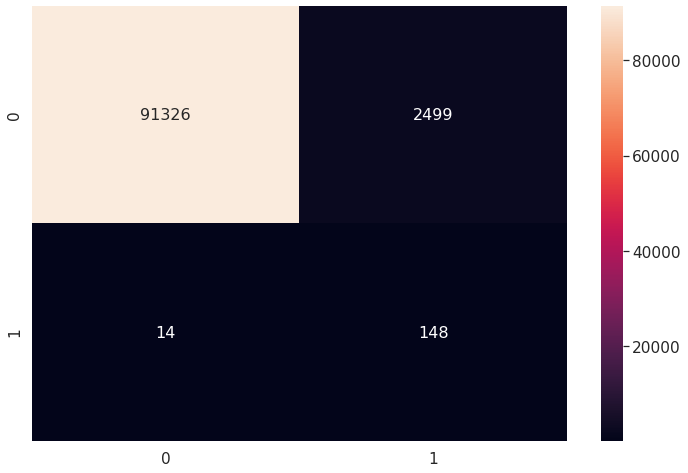

In [ ]:
print(" "*28, "confusion matrix")
plt.figure(figsize=(12,8))
matrix_1=confusion_matrix(y_test_s,  y_pred_smenn)
oversampled_cm = pd.DataFrame(matrix_1)
sns.set(font_scale=1.4)#for label size
labels = ['0','1']
sns.heatmap(oversampled_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)
plt.show()

### Observation
It detects almost similar to Tomek links.

## One-Sided Selection Method
It is an undersampling technique combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. The Tomek Links method is used to remove noisy examples on the class boundary, whereas CNN is used to remove redundant examples from the interior of the density of the majority class.

In [ ]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(return_indices=True)
X_train_oss, y_train_oss, idx_resampled = oss.fit_sample(X_train_s, y_train_s)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
oss_pred=pred_df.fit(X_train_oss, y_train_oss)
y_pred_oss = oss_pred.predict(X_test_s)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test_s, y_pred_oss)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test_s, y_pred_oss)))
print("Recall on test set: %0.3f"%(recall_score(y_test_s, y_pred_oss)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test_s, y_pred_oss)))
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_test_s, y_pred_oss, rownames = ['True'], colnames = ['Predicted'], margins = True))

Accuracy on test set: 99.920%
Precision on test set: 0.866
Recall on test set: 0.636
F1-Score on test set: 0.733
Confusion Matrix - Training Dataset
Predicted      0    1    All
True                        
0          93809   16  93825
1             59  103    162
All        93868  119  93987


                             confusion matrix


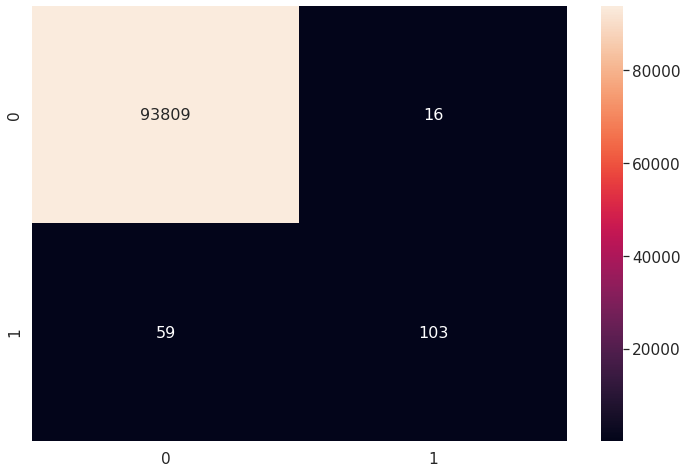

In [ ]:
print(" "*28, "confusion matrix")
plt.figure(figsize=(12,8))
matrix_1=confusion_matrix(y_test_s,  y_pred_oss)
oversampled_cm = pd.DataFrame(matrix_1)
sns.set(font_scale=1.4)#for label size
labels = ['0','1']
sns.heatmap(oversampled_cm, annot=True,annot_kws={"size": 16}, fmt='g',xticklabels=labels, yticklabels=labels)
plt.show()

### Observation
It Missclassifies Fraud cases as Non-fraud in (59/162) i.e.36% cases. Whereas for Negative cases it detects with better accuracy. 

## COMPARISION OF VARIOUS SAMPLING METHODS:

1. Precision
2. Recall
3. F1 Score
4. AUC-ROC Value

In [ ]:
#PRECISION
print("Precision for UNDERSAMPLING: %0.3f"%(precision_score(y_test_s, y_pred)))
print("Precision for OVERSAMPLING: %0.3f"%(precision_score(y_test_s, y_pred_1)))
print("Precision for SMOTE : %0.3f"%(precision_score(y_test_s, test_smote)))
print("Precision for Adaptive Synthetic Sampling Method : %0.3f"%(precision_score(y_test_s, y_pred_adasyn)))
print("Precision for SMOTE-TOMEK LINKS : %0.3f"%(precision_score(y_test_s, y_pred_tomek)))
print("Precision for MS-SMOTE: %0.3f"%(precision_score(y_test_s, y_pred_ms)))
print("Precision for SMOTE + ENN: %0.3f"%(precision_score(y_test_s, y_pred_smenn)))
print("Precision for ONE-SIDED SELECTION: %0.3f"%(precision_score(y_test_s, y_pred_oss)))

Precision for UNDERSAMPLING: 0.038
Precision for OVERSAMPLING: 0.068
Precision for SMOTE : 0.059
Precision for Adaptive Synthetic Sampling Method : 0.018
Precision for SMOTE-TOMEK LINKS : 0.060
Precision for MS-SMOTE: 0.291
Precision for SMOTE + ENN: 0.056
Precision for ONE-SIDED SELECTION: 0.866


In [ ]:
#RECALL SCORE
print("Recall_Score for UNDERSAMPLING: %0.3f"%(recall_score(y_test_s, y_pred)))
print("Recall_Score for OVERSAMPLING: %0.3f"%(recall_score(y_test_s, y_pred_1)))
print("Recall_Score for SMOTE : %0.3f"%(recall_score(y_test_s, test_smote)))
print("Recall_Score for Adaptive Synthetic Sampling Method : %0.3f"%(recall_score(y_test_s, y_pred_adasyn)))
print("Recall_Score for SMOTE-TOMEK LINKS : %0.3f"%(recall_score(y_test_s, y_pred_tomek)))
print("Recall_Score for MS-SMOTE: %0.3f"%(recall_score(y_test_s, y_pred_ms)))
print("Recall_Score for SMOTE + ENN: %0.3f"%(recall_score(y_test_s, y_pred_smenn)))
print("Recall_Score for ONE-SIDED SELECTION: %0.3f"%(recall_score(y_test_s, y_pred_oss)))

Recall_Score for UNDERSAMPLING: 0.926
Recall_Score for OVERSAMPLING: 0.932
Recall_Score for SMOTE : 0.914
Recall_Score for Adaptive Synthetic Sampling Method : 0.932
Recall_Score for SMOTE-TOMEK LINKS : 0.914
Recall_Score for MS-SMOTE: 0.852
Recall_Score for SMOTE + ENN: 0.914
Recall_Score for ONE-SIDED SELECTION: 0.636


### COmaprision of the V-1 to V-28 Columns

(Performing before Transformation of skewness

In [ ]:
pca_vars = ['V%i' % k for k in range(1,29)]

In [ ]:
#Plotting the Mean of all the PCA transformed features
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

In [ ]:
#Variance Plot
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='darkred')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standard Deviations')

In [ ]:
#SKewness
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses')

OBSERVATION-

1. All have zero means
2. The PCA variables have roughly unit variance, but as low as ~0.3 and as high as ~1.9
3. A few of the PCA variables are significantly skewed. Let's plot a histogram of one of the particularly skewed variables, V8, to see the distribution in detail.

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['V8'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('V8')